In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

Get to know your data!

1.   Pick 3 features and plot some histograms for them. Observe the distributions, where does the most common values land? What values would you consider outliers? (its ok if there are none, this is also an insight).
2.   Plot a distribution for the 'label' column. The 0 and 1 represents Benign and Malignant. Is there a class imbalance? Use either undersampling or oversampling to try and remedy this if you think there is.
3. Replace all values of 0 with the string 'Benign' and all values of 1 with 'Malignant'



In [3]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


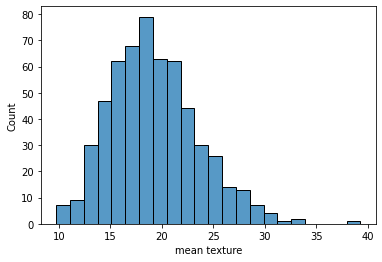

In [4]:
sns.histplot(data=breast_dataset, x=breast_dataset.columns[1])

By ploting mean texture distribution, most values land in range (14,22).A value in range (38.5,39.5) could be considered as an outlier. 

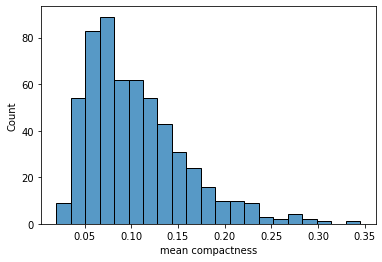

In [5]:
sns.histplot(data=breast_dataset, x=breast_dataset.columns[5])

By ploting mean compactness distribution, most values land in range (0.04,0.15), and there is no outlier.

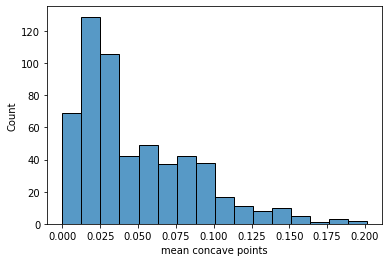

In [6]:
sns.histplot(data=breast_dataset, x=breast_dataset.columns[7])

By ploting mean concave distribution, most values land in range (0.0,0.1), and there is no outlier.

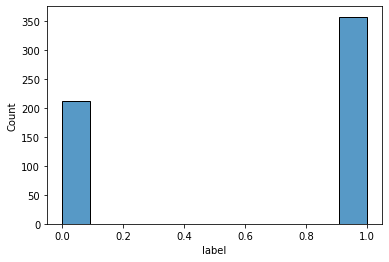

In [7]:
sns.histplot(data=breast_dataset, x="label")

There is significant sample size difference between Benign and Malignant patients. However, it might not be considered as imbalance since difference might exist naturally, thus no sampling modification is needed.

In [46]:
label_list = breast_dataset['label'].unique()

for i in range(breast_dataset.shape[0]):
  if breast_dataset['label'][i] == label_list[0]:
    breast_dataset['label'][i] = "Benign"
  else:
    breast_dataset['label'][i] = "Malignant"


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: label, Length: 569, dtype: float64
0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: label, Length: 569, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


The range of values for each feature is quite different between each other. Use the StandardScaler and the sklearn documentation to normalize the dataset.

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scale_features = features_labels[0:-2]
breast_dataset[scale_features] = ss.fit_transform(breast_dataset[scale_features])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,0.11890,Benign
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.08902,Benign
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.08758,Benign
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,0.17300,Benign
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,0.07678,Benign


Now theres a normalized dataset, use the PCA package from sklearn to reduce the data's dimension down to 2D. After this, turn the resulting 2 components into a dataframe.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = breast_dataset.loc[:,scale_features] 
pca.fit(X)
pca_2d = pd.DataFrame(pca.components_)
print(pca_2d)

         0         1         2   ...        26        27        28
0  0.226590  0.105675  0.234804  ...  0.226266  0.251797  0.118789
1 -0.227801 -0.057232 -0.208082  ...  0.100231 -0.004462  0.139508

[2 rows x 29 columns]


Using the following code, print the amount of variance that is captured (explained) by each principal component. Calculate how much variance is left uncalculated.

In [49]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
left = 1-pca.explained_variance_ratio_[0]-pca.explained_variance_ratio_[1]
print('{} variance is left uncalculated.'.format(left))

Explained variation per principal component: [0.45067848 0.18239963]
0.366921883278307 variance is left uncalculated.


We now have the principal components that we can use as axes for plotting as well as two columns of values for 569 samples. Add the label column from the original dataset to your PCA dataframe.
Plot all 569 samples on a graph and colour code them based on Benign and Malignant (you may use matplotlib or seaborn or any package you are most comfortable with)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   569 non-null    float64
 1   second  569 non-null    float64
 2   label   569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


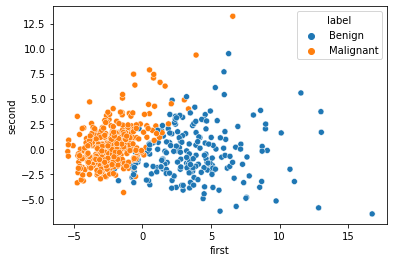

In [50]:
PCA_df = pd.DataFrame(pca.fit_transform(X))
PCA_df.columns = ['first','second']
PCA_df['label'] = breast_dataset['label']

sns.scatterplot(data=PCA_df, x="first", y="second", hue="label")


Congrats! You should be able to see that Benign and Malignant datapoints are clearly separable into clusters, so there exists a clear separation between the two in the original dataset